In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

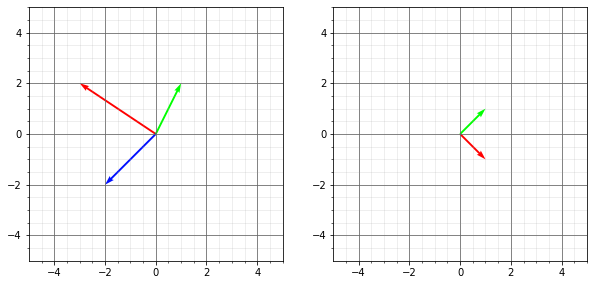

In [53]:
def vplot2D(ax, v, colours, xlim=[-5,5], ylim=[-5,5]):
    # append two columns of zeros to the left (represents origin)
    vplot = np.vstack((np.zeros((2,v.shape[1])), v))
    ax.quiver(vplot[0,:], vplot[1,:], vplot[2,:], vplot[3,:], angles='xy', scale_units='xy', scale=1, color=colours)
    
    # Set the limits so arrows are not out of view
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # Show the major grid lines with dark grey lines
    ax.grid(b=True, which='major', color='#666666', linestyle='-')

    # Show the minor grid lines with very faint and almost transparent grey lines
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    ax.set_aspect(1)

# Testing the plotting function
# Set 2x1 figure    
fig, ax = plt.subplots(1,2, figsize=(10,10))

v1 = np.array([[-3, 1, -2],
               [2, 2, -2]])
v2 = np.array([[1, 1], 
               [-1, 1]])
cols = ['#FF0000', '#00FF00', "#000FFF"]

vplot2D(ax[0], v1, colours=cols)
vplot2D(ax[1], v2, colours=cols)

### Principle Component Analysis (PCA) is a method of dimensionality reduction to minimize redundancy of an overdetermined system. 

### Suppose you have an overdetermined system.

$X = \begin{bmatrix}
           x_{1} & y_{1} \\
           x_{2} & y_{2} \\
           ...  & ... \\
           x_{n} & y_{n}
\end{bmatrix} $

Data generation below inspired from: https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.12-Example-Principal-Components-Analysis/

In [64]:
# Generate 50 random x values from (0, 20)
x = 20*np.random.rand(500)
# Generate 50 random y values directly proportional to x
y = x + 2*np.random.randn(500)+1

# Reshape to column vectors
x = x.reshape(500, 1)
y = y.reshape(500, 1)

# Stack horizontally to 50x2 so we can plot
X = np.hstack([x, y])
X[:5]

array([[ 1.79528498,  3.245035  ],
       [ 4.44398431,  4.35132719],
       [17.03380933, 17.65247022],
       [13.81374734, 13.79979529],
       [ 1.02088376,  3.44145173]])

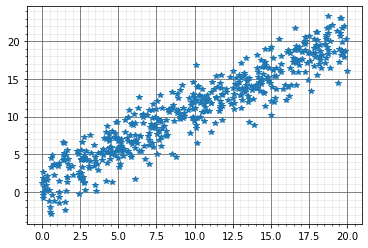

In [65]:
plt.plot(X[:,0], X[:,1], '*')

# Show the grid
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

### Mean Normalize the data by subtracting the mean of x column and y column from the original $X-\bar{X}$, this centres the data around the origin and preserves the standard deviation. In some cases where the 

$\frac{(X - \bar{X})}{s_{j}}$

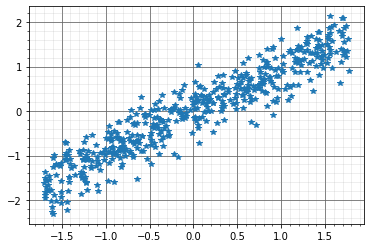

In [66]:
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

plt.plot(X[:,0], X[:,1], '*')

# Show the grid
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

### We know that variance is a single-value measure of the spread of data. Covariance allows us to see how the directions of two vectors differ from each other. $C_{X}=\dfrac{1}{n-1}XX^{T}$. Orthogonal vectors are indicated by a 0 covariance, which means that they are statistically independent. 

### Note the following: 
- The values along the main diagonal ($C_{i,j}$ where $i=j$) measure variance 
- Non-diagonals are symmetric $C_{i,j} = C_{j,i}$ and measure covariance
- Smaller values indicate that vectors are more statistically independent
- Higher values indicate that vectors are more statistically dependent, and thus redundant

$$Cov(X) = 
\begin{bmatrix}
    \sigma^{2}_{x_{1},x_{1}} & \sigma^{2}_{x_{1},y_{1}} & \sigma^{2}_{x_{1},x_{2}} & ... & \sigma^{2}_{x_{1},y_{3}} \\
    \sigma^{2}_{y_{1},x_{1}} & \sigma^{2}_{y_{1},y_{1}} & \sigma^{2}_{y_{1},x_{2}} & ... & \sigma^{2}_{y_{1},y_{3}} \\
    \sigma^{2}_{x_{2},x_{1}} & \sigma^{2}_{x_{2},y_{1}} & \sigma^{2}_{x_{2},x_{2}} & ... & \sigma^{2}_{x_{2},y_{3}} \\
    \vdots                   & \vdots                   & \vdots                   & \ddots & \vdots \\
    \sigma^{2}_{y_{3},x_{1}} & \sigma^{2}_{y_{3},y_{1}} & \sigma^{2}_{y_{3},x_{2}} & ... & \sigma^{2}_{y_{3},y_{3}} \\
\end{bmatrix}
$$

### Our goal is to diagonalize the covariance matrix to remove redundancies. We can use Eigendecomposition or SVD.

In [75]:
cov_x = (X@X.T)/(X.shape[0]-1)

cov_x

array([[ 0.2,  0.4,  0. , -0.2,  0.2,  0.6],
       [ 0.4,  0.8,  0. , -0.4,  0.4,  1.2],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-0.2, -0.4,  0. ,  0.2, -0.2, -0.6],
       [ 0.2,  0.4,  0. , -0.2,  0.2,  0.6],
       [ 0.6,  1.2,  0. , -0.6,  0.6,  1.8]])

In [76]:
eig_vals, eig_vecs = np.linalg.eig(cov_x)

In [79]:
eig_vecs

(6, 6)

In [84]:
Y = eig_vecs.T@X
Y

array([[-1.11022302e-16],
       [ 4.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.22044605e-16],
       [ 0.00000000e+00]])

In [86]:
cov_y = (Y@Y.T)/(Y.shape[0]-1) 

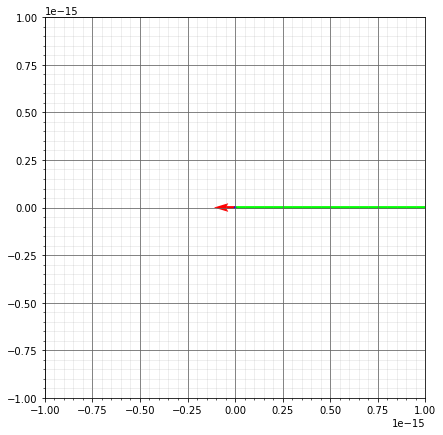

In [92]:
fig, ax = plt.subplots(1, figsize=(7,7))

cols = ['#FF0000', '#00FF00', "#000FFF"]

Y_plot = Y.reshape(2,3)

vplot2D(ax, Y_plot, colours=cols, xlim=[-0.000000000000001,0.000000000000001], ylim=[-0.000000000000001,0.000000000000001])

In [104]:
np.random.seed(123)
x = 5*np.random.rand(100)
y = 2*x + 1 + np.random.randn(100)

x = x.reshape(100, 1)
y = y.reshape(100, 1)

X = np.hstack([x, y])
X.shape


(100, 2)

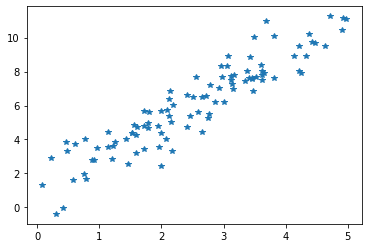

In [27]:
plt.plot(X[:,0], X[:,1], '*')
plt.show()

In [22]:
def centerData(X):
    X = X.copy()
    X -= np.mean(X, axis = 0)
    return X

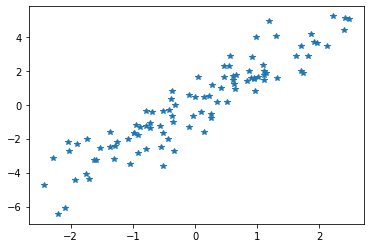

In [23]:
X_centered = centerData(X)
plt.plot(X_centered[:,0], X_centered[:,1], '*')
plt.show()

In [28]:
eigVals, eigVecs = np.linalg.eig(X_centered.T.dot(X_centered))
eigVecs

array([[-0.91116273, -0.41204669],
       [ 0.41204669, -0.91116273]])

In [29]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

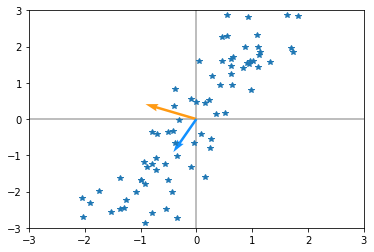

In [30]:
orange = '#FF9A13'
blue = '#1190FF'
plotVectors(eigVecs.T, [orange, blue])
plt.plot(X_centered[:,0], X_centered[:,1], '*')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

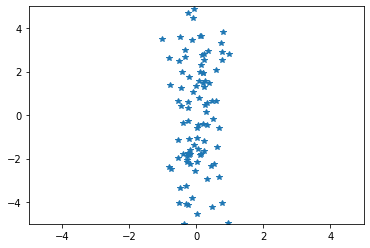

In [31]:
X_new = eigVecs.T.dot(X_centered.T)

plt.plot(eigVecs.T.dot(X_centered.T)[0, :], eigVecs.T.dot(X_centered.T)[1, :], '*')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()